# Check difference between github C and self generate c by FINN

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nt = 51
c_github_langmuir = np.load("../data/synthetic_data/retardation_langmuir/c_train.npy")[:Nt]
c_github_linear = np.load("../data/synthetic_data/retardation_linear/c_train.npy")[:Nt]
c_github_freundlich = np.load("../data/synthetic_data/retardation_freundlich/c_train.npy")[:Nt]
c_FINN_forward_langmuir = np.load("../data/synthetic_data/FINN_forward_solver/retardation_langmuir/c_train.npy")[:Nt]
c_FINN_forward_linear = np.load("../data/synthetic_data/FINN_forward_solver/retardation_linear/c_train.npy")[:Nt]

print(c_github_langmuir.shape)
print(c_FINN_forward_linear.shape)
print(c_FINN_forward_langmuir.shape)

(51, 2, 26)
(51, 2, 26)
(51, 2, 26)


7.21e-02
4.09e-04


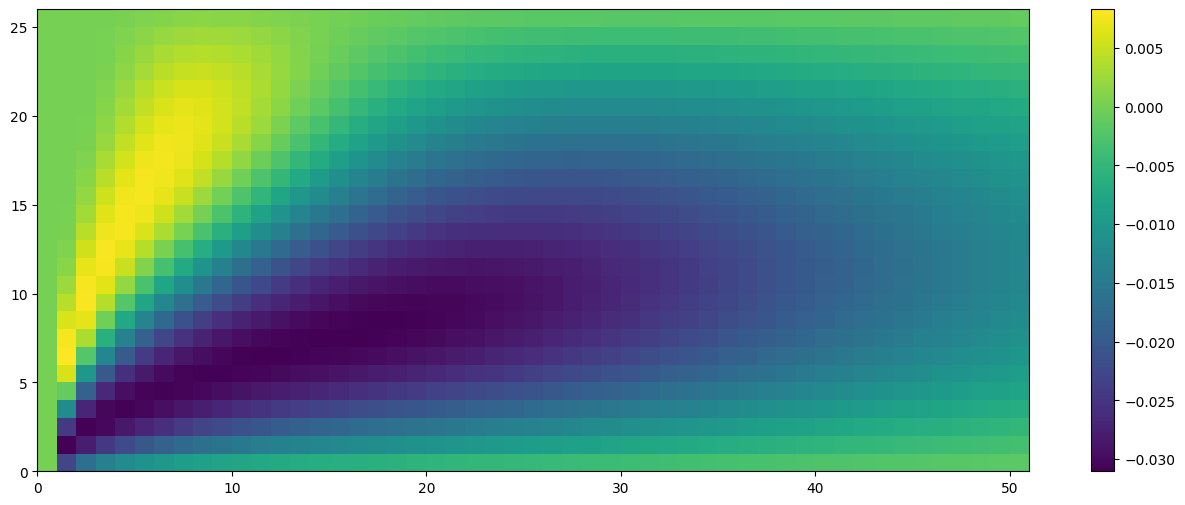

In [3]:
diff_FINN_langmuir_linear = c_FINN_forward_langmuir - c_FINN_forward_linear
print(f"{np.abs(diff_FINN_langmuir_linear).max():.2e}")
print(f"{np.square(diff_FINN_langmuir_linear).mean():.2e}")

plt.figure(figsize=(16, 6))
plt.colorbar(plt.pcolormesh(diff_FINN_langmuir_linear[:, 0, :].T))
plt.show()

The above shows that the difference between the concentration field computed using a linear and a Langmuir isotherm using the FINN forward code are not that different (MSE < 1e-3 and max error < 0.1).

Below we compare this with the error between the **Langmuir c from github** and the **Langmuir FINN forward c**

4.38e-01
3.49e-02


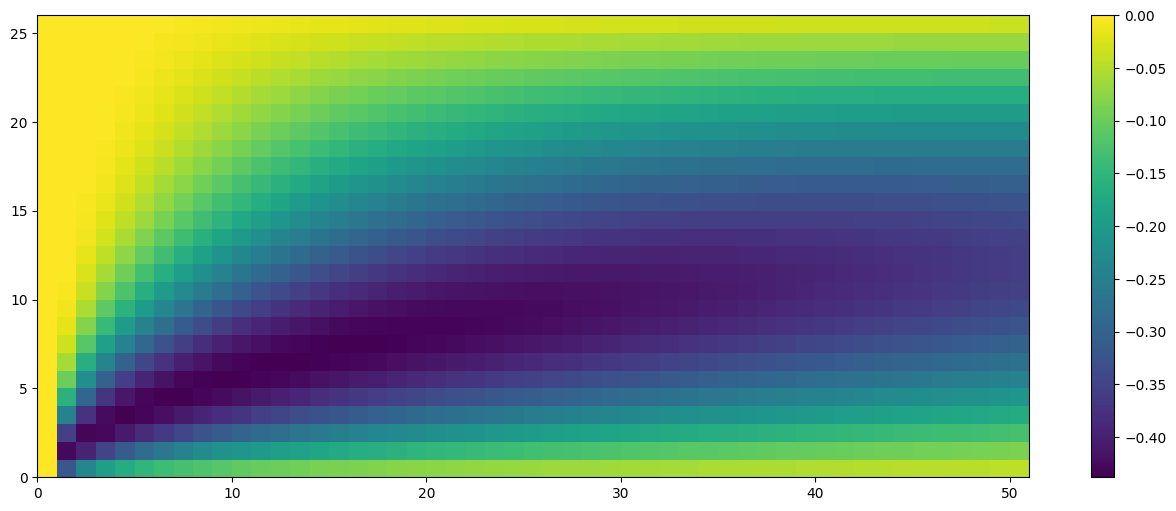

In [4]:
import matplotlib.pyplot as plt

diff_langmuir_FINN_langmuir = c_github_langmuir - c_FINN_forward_langmuir
print(f"{np.abs(diff_langmuir_FINN_langmuir).max():.2e}")
print(f"{np.square(diff_langmuir_FINN_langmuir).mean():.2e}")

plt.figure(figsize=(16, 6))
plt.colorbar(plt.pcolormesh(diff_langmuir_FINN_langmuir[:, 0, :].T))
plt.show()

Here, both errors are much larger (> one order of magnitude). This is surprising.

But how do the isotherms look like when trained on FINN forward c compared to github c?

## Isotherms

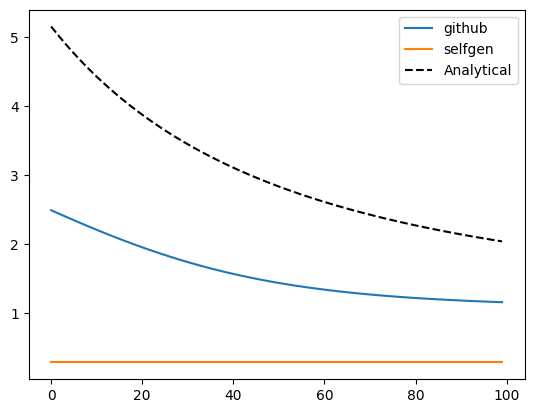

In [23]:
finn_dirs = {
    "github" : Path("../data_out/FINN_forward_tests/finn_langmuir_github_c"),
    "selfgen" : Path("../data_out/FINN_forward_tests/finn_langmuir_selfgen_c"),
}

for c_origin, finn_dir in finn_dirs.items():
    ret = np.load(finn_dir / "predicted_retardations/retPred_100.npy")
    plt.plot(ret, label=c_origin)

ret_analytical = np.load(finn_dirs["github"] / "retardation_langmuir.npy")

plt.plot(ret_analytical, "k--", label="Analytical")
plt.legend()
plt.show()

Surprisingly, both have very high error.

What's the c-error then?

In [20]:
for c_origin, finn_dir in finn_dirs.items():
    c_train = np.load(finn_dir / "c_train.npy")
    c_pred = np.load(finn_dir / "c_predictions.npy")
    print(f"{c_origin}, {np.square(c_train - c_pred).mean():.2e}")

github, 4.77e-07
selfgen, 1.07e-04


What's going on here? How can the isotherm be so different from the analytical one but still get a good c-error?

Let's check if this isotherm still produces this c using the FINN forward code or if there is a bug by me somewhere.

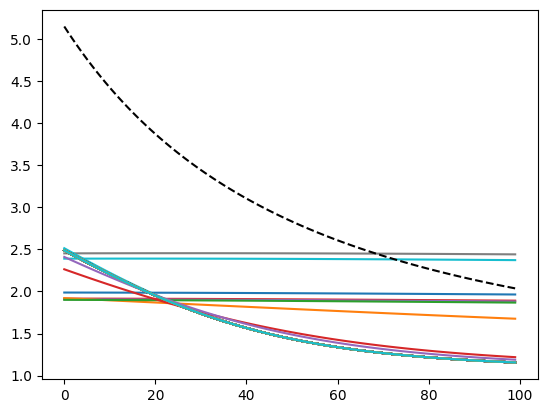

In [19]:
for c_origin, finn_dir in finn_dirs.items():
    if c_origin != "github":
        continue
    for p in finn_dir.glob("predicted_retardations/retPred_*.npy"):
        ret = np.load(p)
        plt.plot(ret)

plt.plot(ret_analytical, "k--", label="Analytical")

plt.show()